In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
import scipy
from scipy.io import loadmat
from data_generator import DataGenerator

In [4]:
from likelihood import GaussianLogLikelihood
from prior import ComplexityLogPrior
from posterior import LogPosterior
from mcmc import MCMC
from sequential_mc import SequentialMC
from util import generate_binary_coef_random
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
data = loadmat('../data/phase_field_oneD_last641_filtered.mat')

In [7]:
data['usol'].shape

(500, 641)

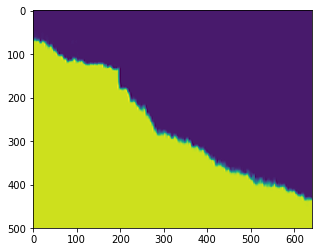

In [8]:
plt.imshow(data['usol'])

In [9]:
data['usol'].shape

(500, 641)

In [10]:
# calculate derivatives and prepare data
u = data['usol'][200:300,200:300]
t = np.squeeze(data['t'])[200:300]
x = np.squeeze(data['x'])[200:300]

In [11]:
shape = u.shape

In [12]:
u.shape

(100, 100)

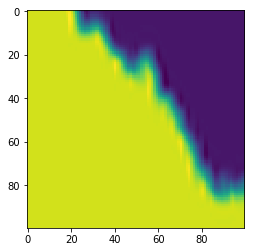

In [13]:
plt.imshow(u)

In [37]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [38]:
regressor = GaussianProcessRegressor()

In [59]:
x_mesh, t_mesh = np.meshgrid(x,t,indexing='ij')

In [60]:
X_train = np.vstack([x_mesh.flatten(),t_mesh.flatten()]).T

In [61]:
X_train.shape

(10000, 2)

In [62]:
from sklearn.utils import shuffle

In [75]:
y_train = u.flatten()

In [64]:
regressor.fit(X_train[:10000], y_train[:10000])

GaussianProcessRegressor()

In [65]:
u_predict = regressor.predict(X_train)

In [66]:
u_predict = np.reshape(u_predict,shape)

In [67]:
u_predict.shape

(100, 100)

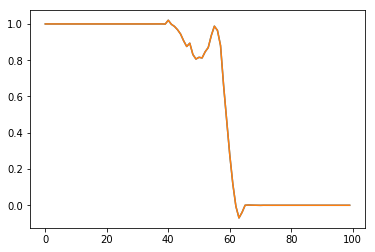

In [74]:
plt.plot(u[30,:])
plt.plot(u_predict[30,:])

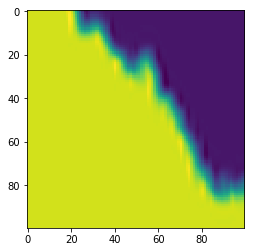

In [68]:
plt.imshow(u_predict)

In [119]:
from numerical_derivative import ChebyshevLocalFit_1D
width = 11                
du_x, du_xx, du_t = ChebyshevLocalFit_1D(u, x, t, deg=3, width=width, diff=2)
u = u[width:(-width), width:(-width)]

In [13]:
random_seed = 1001

In [14]:
np.random.seed(random_seed)

In [213]:
data = np.load('train_data_experiment.npy')

In [214]:
dg = DataGenerator()

In [215]:
data[:,:-1].shape

(45000, 3)

In [216]:
u = data[:,0]
u_x = data[:,1]
u_xx = data[:,2]
u_t = data[:,3]

In [218]:
u = np.reshape(u, (150,300))
u_t = np.reshape(u_t, (150,300))
u_x = np.reshape(u_x, (150,300))
u_xx = np.reshape(u_xx, (150,300))

In [219]:
ind = 10

In [97]:
n_samples = 5000

In [99]:
np.random.shuffle(data)
data = data[:n_samples]

In [100]:
X, names, complexity = dg(data[:,:-1], descriptions=['u','u_x','u_xx'] )

In [101]:
X.shape

(5000, 20)

In [102]:
Y = data[:,-1]
#Y = -0.9*X[:,0] + 10.*X[:,2] +1.9*X[:,3] -1.*X[:,9]

In [175]:
prior = ComplexityLogPrior(method='num_terms', simplicity_preference=0.1,complexity_terms=1.)

In [176]:
likelihood = GaussianLogLikelihood(X,Y,reg_normalization=False,random_state=random_seed)

In [177]:
posterior = LogPosterior(prior, likelihood)

In [178]:
import itertools

In [179]:
init_coefs = generate_binary_coef_random(len(names),40)

In [180]:
sequentialmc = SequentialMC(posterior=posterior,log_file='mc.csv')

In [181]:
for i, name in enumerate(names):
    print (i, name)

0 1
1 u
2 u_x
3 u_xx
4 u**2
5 u*u_x
6 u*u_xx
7 u_x**2
8 u_x*u_xx
9 u_xx**2
10 u**3
11 u**2*u_x
12 u**2*u_xx
13 u*u_x**2
14 u*u_x*u_xx
15 u*u_xx**2
16 u_x**3
17 u_x**2*u_xx
18 u_x*u_xx**2
19 u_xx**3


In [182]:
X.shape

(5000, 20)

In [183]:
from get_pareto import ParetoSet

In [184]:
#sequentialmc.pareto_set = ParetoSet()

In [185]:
#init_coefs[0] = np.array([1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0])

In [186]:
init_coefs

array([[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 0,

In [200]:
pareto_set = sequentialmc(samples=init_coefs,beta0_nsteps=0,beta0to1_nsteps=100,beta1_nsteps=100, mcmc_nsteps=10,feature_descriptions=names )

step: 0, beta:  0.000
step: 1, beta:  0.010
step: 2, beta:  0.020
step: 3, beta:  0.030
step: 4, beta:  0.040
step: 5, beta:  0.051
step: 6, beta:  0.061
step: 7, beta:  0.071
step: 8, beta:  0.081
step: 9, beta:  0.091
step: 10, beta:  0.101
step: 11, beta:  0.111
step: 12, beta:  0.121
step: 13, beta:  0.131
step: 14, beta:  0.141
step: 15, beta:  0.152
step: 16, beta:  0.162
step: 17, beta:  0.172
step: 18, beta:  0.182
step: 19, beta:  0.192
step: 20, beta:  0.202
step: 21, beta:  0.212
step: 22, beta:  0.222
step: 23, beta:  0.232
step: 24, beta:  0.242
step: 25, beta:  0.253
step: 26, beta:  0.263
step: 27, beta:  0.273
step: 28, beta:  0.283
step: 29, beta:  0.293
step: 30, beta:  0.303
step: 31, beta:  0.313
step: 32, beta:  0.323
step: 33, beta:  0.333
step: 34, beta:  0.343
step: 35, beta:  0.354
step: 36, beta:  0.364
step: 37, beta:  0.374
step: 38, beta:  0.384
step: 39, beta:  0.394
step: 40, beta:  0.404
step: 41, beta:  0.414
step: 42, beta:  0.424
step: 43, beta:  0.43

KeyboardInterrupt: 

In [201]:
pareto_set = sequentialmc.pareto_set

In [202]:
pareto_set.save_csv('pareto_set_experiment.csv')

In [203]:
pareto_set.to_array()

array([[2.00000000e+00, 2.43968765e-02],
       [3.00000000e+00, 1.77176841e-02],
       [4.00000000e+00, 1.65536839e-02],
       [5.00000000e+00, 1.38346740e-02],
       [6.00000000e+00, 1.38045733e-02],
       [7.00000000e+00, 1.28248341e-02],
       [8.00000000e+00, 1.27045171e-02],
       [9.00000000e+00, 1.23361733e-02],
       [1.20000000e+01, 1.22702723e-02],
       [1.30000000e+01, 1.22402559e-02],
       [1.40000000e+01, 1.22391122e-02]])

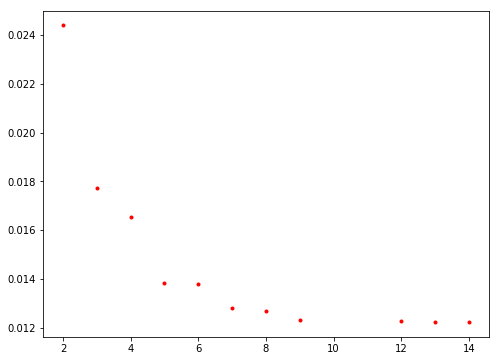

In [204]:
pareto_set.plot()

In [205]:
pareto_set[0].data

-0.185232351776985*u**2*u_x - 4.42173681816584*u_x**2

In [206]:
pareto_set[1].data

-4.23633499853767*u**2*u_x + 4.05196360523886*u*u_x - 15.282432532225*u_x**2

In [207]:
pareto_set[2].data

-50.9151838889856*u_x**3 + 1144.6918467288*u_x*u_xx**2 - 157.395928212894*u_xx**2 - 8.08393275251475e-7

In [208]:
pareto_set[3].data

-11.9083265567301*u*u_x*u_xx - 0.248177074867163*u*u_x - 134.378128209555*u_x**3 + 9.19002105732799*u_x**2 - 155.122323914716*u_xx**2

In [209]:
pareto_set[4].data

0.635891394517524*u**2*u_xx + 15.3487396237924*u*u_x**2 - 130.809183273006*u_x**3 + 27.1623265125787*u_x*u_xx - 3528.99355768995*u_xx**3 - 137.83714694009*u_xx**2

In [210]:
pareto_set[5].data

4.99413365187832*u**2*u_x - 11.6146426477562*u*u_x*u_xx - 5.17385052448521*u*u_x - 274.327595663912*u_x**3 + 35.2591432222176*u_x**2 - 280.215304648183*u_xx**2 - 4.97404942481028e-5

In [211]:
pareto_set[6].data

5.30979320779647*u**2*u_x + 10.7767993632666*u*u_x**2 + 19.5631997870607*u*u_x*u_xx - 5.83368693050132*u*u_x - 0.924655880262673*u*u_xx - 312.453602438764*u_x**3 + 36.1644331052005*u_x**2 - 264.208114664753*u_xx**2

In [212]:
pareto_set[7].data

4.23620958871735*u**2*u_x + 29.8637574911216*u*u_x**2 - 4.62976468717828*u*u_x + 252.375580906372*u*u_xx**2 - 288.416072878808*u_x**3 - 233.145816512571*u_x**2*u_xx + 20.8427108860787*u_x**2 + 63.7531388155491*u_x*u_xx - 378.515844363362*u_xx**2